R0 =  2.0
Dag: 0   9999  friska,  1  sjuka  0  immuna  0 doda
Dag: 1   9999  friska,  1  sjuka  0  immuna  0 doda
Dag: 2   9999  friska,  1  sjuka  0  immuna  0 doda
Dag: 3   9999  friska,  1  sjuka  0  immuna  0 doda
Dag: 4   9999  friska,  1  sjuka  0  immuna  0 doda
Dag: 5   9999  friska,  1  sjuka  0  immuna  0 doda
Dag: 6   9999  friska,  1  sjuka  0  immuna  0 doda
Dag: 7   9998  friska,  2  sjuka  0  immuna  0 doda
Dag: 8   9998  friska,  2  sjuka  0  immuna  0 doda
Dag: 9   9998  friska,  2  sjuka  0  immuna  0 doda
Dag: 10   9997  friska,  2  sjuka  0  immuna  1 doda
Dag: 11   9996  friska,  3  sjuka  0  immuna  1 doda
Dag: 12   9996  friska,  3  sjuka  0  immuna  1 doda
Dag: 13   9992  friska,  7  sjuka  0  immuna  1 doda
Dag: 14   9989  friska,  10  sjuka  0  immuna  1 doda
Dag: 15   9986  friska,  13  sjuka  0  immuna  1 doda
Dag: 16   9984  friska,  15  sjuka  0  immuna  1 doda
Dag: 17   9980  friska,  18  sjuka  1  immuna  1 doda
Dag: 18   9975  friska,  23  sjuka  1  imm

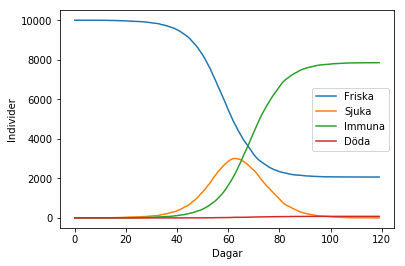

In [21]:
# Mycket förenklad modell för smittspridning som jag skrev efter att ha sett en onlineföreläsning av Tom Britton,  https://www.youtube.com/watch?v=gSqIwXl6IjQ 
# Individer kan vara friska, sjuka, immuna eller doda
# Under den sjuka perioden kan sjuka individer smitta andra friska individer
# Efter sjukdomstiden blir de immuna och blir inte smittade eller smittar andra
# Flaws som jag känner till:
# -Sjuka individer kan smitta individer slumpmässigt i hela populationen = osannolikt
# -R0 som visas är bara det initiala värdet, det ändras sedan under epidemien eftersom sjuka blir immuna
# -De som är sjuka smittar lika mycket under hela sjukperioden
# -De som dör, gör bara det i slutet av sjukperioden
# -Interventioner kan inte göras dvs beteendet kan inte förändras under körningen, (typ att folk isolerar sig, social distansering)
# ******************************************************
# Jag gör absolut inga anspråk på att veta något om epidemiologi eller modellering av utbrott.
# Detta är bara ett sätt för mig att fördriva tiden och kanske förstå lite mer av vad som rapporteras.
# Testa gärna att ändra parametrarna nedan och kör med svarta lilla pilen uppe till vänster
# Observera att modellen bygger på slump, så den genererar inte samma resultat även om parametrarna är lika mellan varje körning
# Greger Lindeberg april 2020
# ******************************************************
import random as rand
import matplotlib.pyplot as plt
# ************************************* Parametrar som kan ändras
pop = 10000
# Population, befolkning
smittorisk = 0.02 
# Detta är en siffra som beskriver sannolikheten för smitta vid ett möte, 
# mycket svårbedömt, beror ju på hur man beter sig sett ngn siffra på 1.5-2%
dodsrisk = 0.01
# Finns siffror på att ca 0.5-1% av de smittade dör, beror ju dock mycket på åldersstruktur
# finns andra rapporter på 3-5% men då är möjligen antal smittade underskattat
moten_per_dag = 10
# Ett genomsnitt av möten en person gör dagligen och därmed utsätts för smittorisk
sjukperiod = 10
# Längden på sjukdomsperioden (och den tid individen smittar)
dagar = 120
# Hur många dagar simuleringen ska köras
# **********************************************************
# Initiera populationen
individer = [];
n = 0
while n < pop:
    individer.append(["frisk",0])
    n = n + 1
print ("R0 = ", moten_per_dag*smittorisk*sjukperiod)
#print (individer)

def gor_en_sjuk(ind):
    #print (ind)
    if individer[ind][0] == "frisk":
        individer[ind][0] = "sjuk"

def smitta(moten, risk):
    for s in range(0,moten,1):
        if (rand.uniform(0,1)<smittorisk):
            gor_en_sjuk(rand.randrange(0,pop,1))
def en_dag():
    for individ in individer:
        if individ[0] == "sjuk" and individ[1]<sjukperiod:
            smitta(moten_per_dag, smittorisk)
            individ[1] = individ[1]+1
        elif individ[0] == "sjuk" and individ[1]==sjukperiod:
            if (rand.uniform(0,1)<dodsrisk):
                individ[0] = "dod"
                individ[1] = 0
            else:
                individ[0] = "immun"
                individ[1] = 0

# Simulering startar här
# Gör en individ sjuk
gor_en_sjuk(rand.randrange(0,pop,1))
#Kor ett antal dagar tex 200
dag_list = []
frisk_list = []
immun_list = []
sjuk_list = []
dod_list = []

for dag in range(0,dagar,1):
    en_dag()
    #print ("apa")
    friska = individer.count(["frisk",0])
    immuna = individer.count(["immun",0])
    doda = individer.count(["dod",0])
    sjuka = pop-friska-immuna-doda
    dag_list.append(dag)
    frisk_list.append(friska)
    immun_list.append(immuna)
    sjuk_list.append(sjuka)
    dod_list.append(doda)
    print("Dag:",dag," ",friska, " friska, ", sjuka, " sjuka ", immuna, " immuna ", doda, "doda")
p_frisk, = plt.plot(dag_list, frisk_list, label = "Friska")
p_sjuk, = plt.plot(dag_list, sjuk_list, label="Sjuka")
p_immun, = plt.plot(dag_list, immun_list, label = "Immuna")
p_dod, = plt.plot(dag_list, dod_list, label="Doda")
plt.legend([p_frisk, p_sjuk, p_immun, p_dod], ['Friska', 'Sjuka','Immuna','Döda'])
plt.ylabel('Individer')
plt.xlabel('Dagar')
plt.show()